<a href="https://colab.research.google.com/github/sahilgoyal7214/Statistics-for-Data-Science/blob/main/Projests%20/SDS_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb  
from tabulate import tabulate
import random 
np.seterr(divide='ignore', invalid='ignore')

In [ ]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }

In [ ]:
def weights(input,output):
  mean_x=np.mean(input)
  mean_y=np.mean(output)

  #compute theta 1
  theta_1=(np.sum((input-mean_x)*(output-mean_y)))/(np.sum((input-mean_x)**2))

  #compute theta 0
  theta_0=mean_y-theta_1*mean_x
  print("Theta_0 and Theta_1 are {} and {} respectively".format(theta_0,theta_1))
  return[theta_0,theta_1]

In [ ]:
def Random_Sampling(arr,sample_size):
  l=[]
  a=len(arr)
  for i in range(sample_size):
    l.append(arr[random.randint(0,a-1)])
  return l

In [ ]:
def Mean_random_sample(arr,sample_size,number_of_sample):
  Mean=[]
  for i in range(number_of_sample):
    l=Random_Sampling(arr,sample_size)
    Mean.append(np.mean(l))
    l=[]
  return np.array(Mean)  

In [ ]:
def Std_dev_random_sample(arr,sample_size,number_of_sample):
  std_dev=[]
  for i in range(number_of_sample):
    l=Random_Sampling(arr,sample_size)
    std_dev.append(np.std(l))
    l=[]
    
  return np.array(std_dev)  

In [ ]:
def find_outliers(data,return_lower_bound=False,return_upper_bound=False):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    if return_lower_bound and return_upper_bound:
      return outliers,lower_bound,upper_bound
    else :
      return outliers

In [ ]:
def u_1(actual,predict):
  u1 = np.sqrt(np.mean((actual - predict) ** 2)) / (np.sqrt(np.mean(actual ** 2)) + np.sqrt(np.mean(predict ** 2)))
  return u1

In [ ]:
def u_2(actual, forecast):
    numerator = 0
    denominator = 0
    for i in range(len(actual)-1):
        numerator = numerator + (abs(forecast[i+1] - actual[i+1])/actual[i])**2
        denominator = denominator + (abs(actual[i+1] - (actual[i]))/actual[i])**2
    a=numerator / denominator
    return a

In [ ]:
def ioa(actual, predicted):
    """Calculate the Index of Agreement (IOA) between two arrays of values.
    
    Parameters:
    actual (array-like): Array of actual values.
    predicted (array-like): Array of predicted values.
    
    Returns:
    float: The Index of Agreement between the two arrays.
    """
    # Calculate the mean of the actual values
    actual_mean = np.mean(actual)
    np.seterr(divide='ignore', invalid='ignore')
    # Calculate the numerator and denominator of the IOA formula
    numerator = np.sum((actual - predicted) ** 2)
    denominator = np.sum((np.abs(predicted - actual_mean) + np.abs(actual - actual_mean)) ** 2)

    # Calculate the IOA as 1 minus the ratio of the two sums
    if denominator == 0 or np.isnan(denominator):
        return np.nan  # return NaN if denominator is zero or invalid
    else:
        return 1 - (numerator/denominator)

In [ ]:
def r_squared(actual, predicted):
    residuals = actual - predicted
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((actual - np.mean(actual))**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


In [ ]:

def inferential_statistics(actual,pridicted):
  ## computing (error)^2 i.e rss using LR
  rss=np.sum((actual-pridicted)**2)
  
  #Computing MSE
  mse=np.mean((actual-pridicted)**2)

  # computing rmse
  rmse=mse**(1/2)

  #compute mae
  mae=np.mean(abs(pridicted-actual))

  #compute mape
  mape=np.mean(abs(actual-pridicted)/actual)*100

  # actual mean
  actual_mean=np.mean(actual)
  
  #actual Standard deviation
  actual_std=np.std(actual)

  #ssd
  ssd=np.sum((actual-actual_mean)**2)
  
  #u1
  u1=u_1(actual,pridicted)
  
  #u2
  u2=u_2(actual,pridicted)
  
  #ioa
  i=ioa(actual,pridicted)

  #r^2
  r2=r_squared(actual,pridicted)
  
  matrix1=["rss","mse","rmse","mae","mape","actual_mean","actual_std","ssd","u1","u2","ioa","R^2"]
  matrix2=[rss,mse,rmse,mae,mape,actual_mean,actual_std,ssd,u1,u2,i,r2]
  matrix2=np.array(matrix2).astype(dtype=float)
  d=dict(zip(matrix1,matrix2))

  table = []
  for key, value in d.items():
      table.append([key, value])

  
  return tabulate(table, headers=["metric", "Value"],tablefmt="pretty")


In [ ]:
df =pd.read_csv("/content/Solar_Irradaition.csv")

In [ ]:
df

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,15-05-2020 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,15-05-2020 00:15,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,15-05-2020 00:30,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,15-05-2020 00:45,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,15-05-2020 01:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,17-06-2020 22:45,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,17-06-2020 23:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,17-06-2020 23:15,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,17-06-2020 23:30,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


<ipython-input-82-d356728f7508>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True,linewidth=3)


<Axes: >

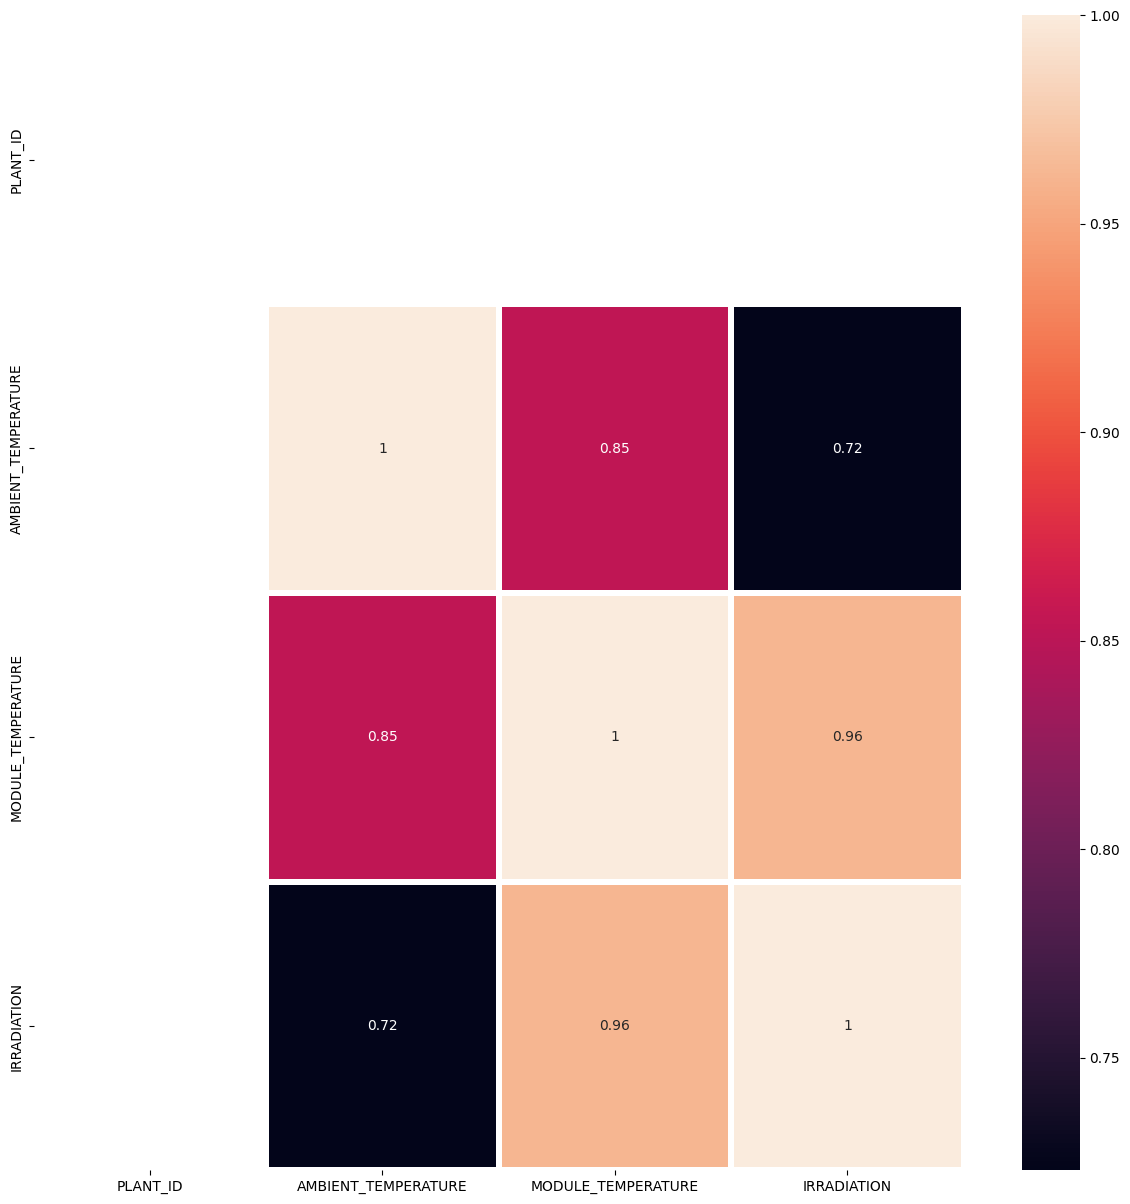

In [ ]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(),annot=True,linewidth=3)

In [ ]:
input=df['MODULE_TEMPERATURE']
output=df['IRRADIATION']
var=df['AMBIENT_TEMPERATURE']

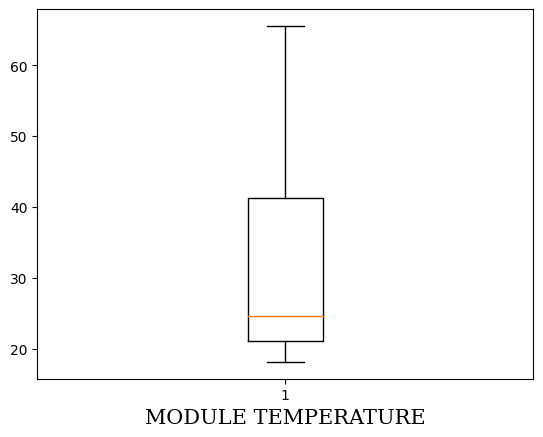

In [ ]:
plt.boxplot(input)
plt.xlabel("MODULE TEMPERATURE",fontdict=font)
plt.show()

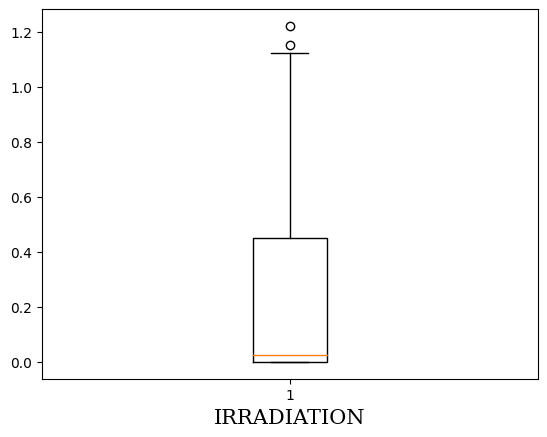

In [ ]:
plt.boxplot(output)
plt.xlabel("IRRADIATION",fontdict=font)
plt.show()

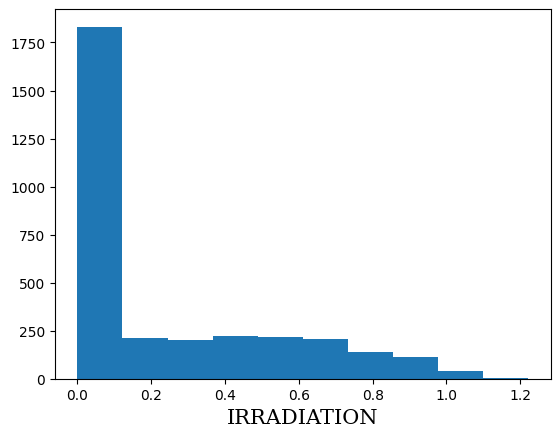

In [ ]:
plt.hist(output)
plt.xlabel('IRRADIATION' ,fontdict=font)
plt.show()

Text(0, 0.5, 'IRRADIATION')

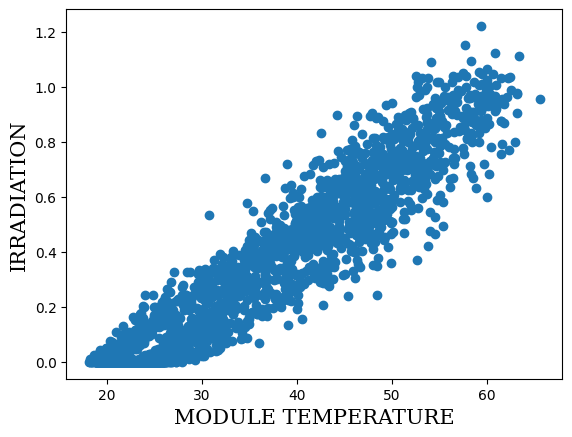

In [ ]:
plt.scatter(input,output)
plt.xlabel('MODULE TEMPERATURE',fontdict=font)
plt.ylabel('IRRADIATION',fontdict=font)

Text(0.5, 0, 'MODULE TEMPERATURE')

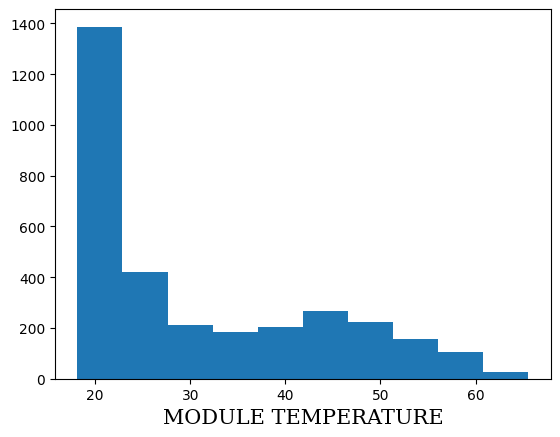

In [ ]:
plt.hist(input)
plt.xlabel('MODULE TEMPERATURE',fontdict=font)

In [ ]:
#Using theta_1 and theta_0 to get y_cap (i.e linear regression model)
t_0,t_1=weights(input,output)
y_bar=t_0+(t_1*input)
y_bar

Theta_0 and Theta_1 are -0.5052046005649196 and 0.02359258524333155 respectively


0       0.034063
1       0.031802
2       0.027806
3       0.022346
4       0.017735
          ...   
3177    0.001573
3178   -0.000582
3179   -0.016621
3180   -0.016013
3181   -0.023256
Name: MODULE_TEMPERATURE, Length: 3182, dtype: float64

In [ ]:
# Test for heteroscedasticity 

In [ ]:
#error
error=output-y_bar
error

0      -0.034063
1      -0.031802
2      -0.027806
3      -0.022346
4      -0.017735
          ...   
3177   -0.001573
3178    0.000582
3179    0.016621
3180    0.016013
3181    0.023256
Length: 3182, dtype: float64

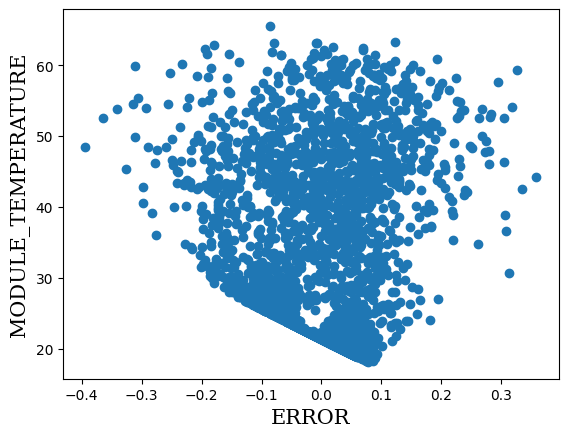

In [ ]:
#scatter plot to check the heteroscedasticity

plt.scatter(error,input) 
plt.xlabel("ERROR",fontdict=font)
plt.ylabel('MODULE_TEMPERATURE',fontdict=font)
plt.show()

In [ ]:
output_sd=np.std(output)

In [ ]:
output = inferential_statistics(output, y_bar)
print(output)

+-------------+----------------------+
|   metric    |        Value         |
+-------------+----------------------+
|     rss     |  21.70434769284355   |
|     mse     | 0.006820976647656679 |
|    rmse     | 0.08258920418345655  |
|     mae     | 0.059187475415154164 |
|    mape     |         inf          |
| actual_mean | 0.22831283005216846  |
| actual_std  |  0.300789091522544   |
|     ssd     |  287.8885148562423   |
|     u1      |  0.1106933014990857  |
|     u2      |         nan          |
|     ioa     |  0.9800537758496922  |
|     R^2     |  0.9246084974814586  |
+-------------+----------------------+


Sampling

---



In [ ]:
# sample size 100
# No of samples 50 (fixed)
std_div=Std_dev_random_sample(output,100,50)
mean=Mean_random_sample(output,100,50)

mean_of_sample_mean=np.mean(mean)
mean_of_sample_std=np.mean(std_div)
print(mean_of_sample_mean)
print(mean_of_sample_std)

0.22613787937700003
0.2931701139492117


In [ ]:
# sample size 150
# No of samples 50 (fixed)
std_div=Std_dev_random_sample(output,150,50)
mean=Mean_random_sample(output,150,50)

mean_of_sample_mean=np.mean(mean)
mean_of_sample_std=np.mean(std_div)
print(mean_of_sample_mean)
print(mean_of_sample_std)

0.22928332473386667
0.296371325181812


In [ ]:
# sample size 200
# No of samples 50 (fixed)
std_div=Std_dev_random_sample(output,200,50)
mean=Mean_random_sample(output,200,50)

mean_of_sample_mean=np.mean(mean)
mean_of_sample_std=np.mean(std_div)
print(mean_of_sample_mean)
print(mean_of_sample_std)

0.23085124195299997
0.2993603767102702


In [ ]:
#outlier  remover
def outlier_remover(arr):    
  count=0
  median=np.median(arr)
  a=len(arr)
  outlier=find_outliers(arr)
  for i in range(a):
    x=arr[i]
    for j in outlier:
      if x==j:
        arr[i]=median
        count=count+1
  return [arr,count]

In [ ]:
new_output,count=outlier_remover(output)
count

Text(0.5, 0, 'IRRADIATION')

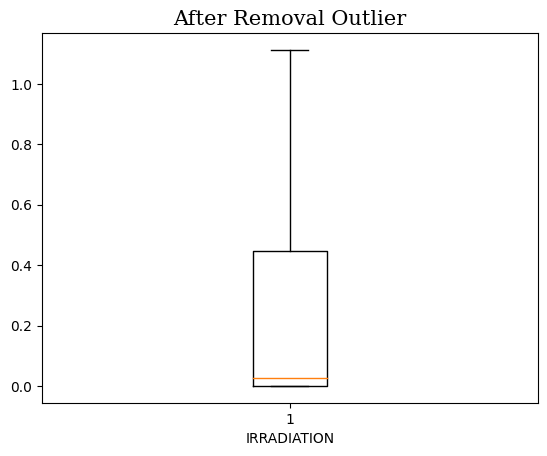

In [ ]:
plt.boxplot(new_output)
plt.title("After Removal Outlier",fontdict=font)
plt.xlabel("IRRADIATION")

In [ ]:
new_t0,new_t1=weights(input,new_output)

Theta_0 and Theta_1 are -0.5000062622326216 and 0.023390804393761504 respectively


In [ ]:
y_new_bar=new_t0+(new_t1*input)
new_stats=inferential_statistics(new_output,y_new_bar)
print(new_stats)

+-------------+----------------------+
|   metric    |        Value         |
+-------------+----------------------+
|     rss     |  23.72092477243065   |
|     mse     | 0.007454721801518118 |
|    rmse     | 0.08634073083729439  |
|     mae     | 0.05967175653933505  |
|    mape     |         inf          |
| actual_mean | 0.22723759688741357  |
| actual_std  | 0.29947123110024326  |
|     ssd     |  285.37136409280447  |
|     u1      | 0.11639332186661491  |
|     u2      |         nan          |
|     ioa     |  0.977905198583434   |
|     R^2     |  0.9168769969340145  |
+-------------+----------------------+
